# ---------------------------------------------
# STEP 1: DATA UNDERSTANDING
# Tool Used: Python (Pandas)
# ---------------------------------------------

In [14]:
import pandas as pd

In [16]:
df = pd.read_csv("C:/Users/vivo/OneDrive/Desktop/Sample - Superstore.csv", encoding='latin1')

# 1.2 View first 5 rows
df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [18]:
# 1.3 Dataset shape (rows, columns)
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])


Number of Rows: 9994
Number of Columns: 21


In [20]:
# 1.4 List all columns
print("\nColumns in the Dataset:")
print(df.columns.tolist())


Columns in the Dataset:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [22]:
# 1.5 Check missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [24]:
# 1.6 Convert Order Date to datetime for proper analysis
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# 1.7 Find date range
min_date = df['Order Date'].min()
max_date = df['Order Date'].max()

print("\nDate Range:")
print("Start Date:", min_date)
print("End Date:", max_date)




Date Range:
Start Date: 2014-01-03 00:00:00
End Date: 2017-12-30 00:00:00


In [26]:

# 1.8 Summary statistics for financial columns
print("\nSummary Statistics (Sales, Profit, Quantity, Discount):")
print(df[['Sales', 'Profit', 'Quantity', 'Discount']].describe())



Summary Statistics (Sales, Profit, Quantity, Discount):
              Sales       Profit     Quantity     Discount
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001    28.656896     3.789574     0.156203
std      623.245101   234.260108     2.225110     0.206452
min        0.444000 -6599.978000     1.000000     0.000000
25%       17.280000     1.728750     2.000000     0.000000
50%       54.490000     8.666500     3.000000     0.200000
75%      209.940000    29.364000     5.000000     0.200000
max    22638.480000  8399.976000    14.000000     0.800000


# ---------------------------------------------
# STEP 2 : DATA CLEANING
# Tool: Python (Pandas)
# ---------------------------------------------

In [29]:
import pandas as pd

# 2.1 Load the dataset again (fresh)
df = pd.read_csv("C:/Users/vivo/OneDrive/Desktop/Sample - Superstore.csv", encoding='latin1')


In [31]:
# 2.2 Convert Order Date & Ship Date into real dates
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors="coerce")


In [33]:
# 2.3 Create new time columns (very important for analysis & dashboard)
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month
df["Month_Name"] = df["Order Date"].dt.strftime("%B")
df["Quarter"] = df["Order Date"].dt.quarter

In [35]:
# 2.4 Make sure numbers are numeric
df["Sales"] = pd.to_numeric(df["Sales"], errors="coerce")
df["Profit"] = pd.to_numeric(df["Profit"], errors="coerce")
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["Discount"] = pd.to_numeric(df["Discount"], errors="coerce")


In [37]:
# 2.5 Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

In [39]:
# 2.6 Create Profit Margin (%) column
df["Profit_Margin"] = (df["Profit"] / df["Sales"]) * 100


In [41]:
# 2.7 Create Cost column
df["Cost"] = df["Sales"] - df["Profit"]

In [43]:
# 2.8 Create Loss Flag
df["Is_Loss"] = df["Profit"] < 0

In [45]:
# 2.9 Preview cleaned data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Discount,Profit,Year,Month,Month_Name,Quarter,Profit_Margin,Cost,Is_Loss
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,0.00,41.9136,2016,11,November,4,16.00,220.0464,False
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,3,0.00,219.5820,2016,11,November,4,30.00,512.3580,False
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,2,0.00,6.8714,2016,6,June,2,47.00,7.7486,False
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5,0.45,-383.0310,2015,10,October,4,-40.00,1340.6085,True
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2,0.20,2.5164,2015,10,October,4,11.25,19.8516,False


In [47]:
df.to_csv("cleaned_superstore.csv", index=False)
print("Cleaned file saved!")

Cleaned file saved!


In [49]:
import os
os.listdir()

['.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.gitconfig',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.ms-ad',
 'AppData',
 'Application Data',
 'cleaned_superstore.csv',
 'Conditional Statements, Loops, and Functions.ipynb',
 'Contacts',
 'Cookies',
 'Day1.ipynb',
 'desktop',
 'Documents',
 'Downloads',
 'Favorites',
 'Finance.ipynb',
 'Intro-firstclass',
 'Links',
 'Local Settings',
 'Microsoft',
 'monthly_sales_forecast_12mo.csv',
 'monthly_sales_forecast_12mo_hw.csv',
 'monthly_sales_forecast_12mo_sarimax.csv',
 'monthly_sales_forecast_merge.csv',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'PrintHood',
 'Punee

In [51]:
df = pd.read_csv("cleaned_superstore.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Discount,Profit,Year,Month,Month_Name,Quarter,Profit_Margin,Cost,Is_Loss
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,0.00,41.9136,2016,11,November,4,16.00,220.0464,False
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,3,0.00,219.5820,2016,11,November,4,30.00,512.3580,False
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,2,0.00,6.8714,2016,6,June,2,47.00,7.7486,False
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5,0.45,-383.0310,2015,10,October,4,-40.00,1340.6085,True
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2,0.20,2.5164,2015,10,October,4,11.25,19.8516,False


# ---------------------------------------------
# STEP 3: EXPLORATORY DATA ANALYSIS (Mixed)
# Tool: Python (pandas + matplotlib)
# Run in a Jupyter/Colab notebook for best display of tables + charts
# ---------------------------------------------

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# 3.1 Convert Order Date to datetime (safety)
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")


In [58]:
# 3.2 KPI TABLE (Important metrics)
# -------------------------------------------------

total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
avg_profit_margin = (total_profit / total_sales) * 100
total_orders = len(df)

kpi_table = pd.DataFrame({
    "Metric": ["Total Sales", "Total Profit", "Average Profit Margin (%)", "Total Orders"],
    "Value": [total_sales, total_profit, round(avg_profit_margin, 2), total_orders]
})

print("\n===== KPI TABLE =====")
display(kpi_table)


===== KPI TABLE =====


,Metric,Value
0,Total Sales,2.297201e+06
1,Total Profit,2.863970e+05
2,Average Profit Margin (%),1.247000e+01
3,Total Orders,9.994000e+03


In [60]:
# 3.3 CATEGORY PROFIT TABLE
# -------------------------------------------------

category_profit = df.groupby("Category")[["Sales", "Profit"]].sum().reset_index()
category_profit["Profit_Margin (%)"] = (category_profit["Profit"] / category_profit["Sales"]) * 100

print("\n===== CATEGORY PROFIT =====")
display(category_profit)


===== CATEGORY PROFIT =====


,Category,Sales,Profit,Profit_Margin (%)
0,Furniture,741999.7953,18451.2728,2.486695
1,Office Supplies,719047.0320,122490.8008,17.035158
2,Technology,836154.0330,145454.9481,17.395712


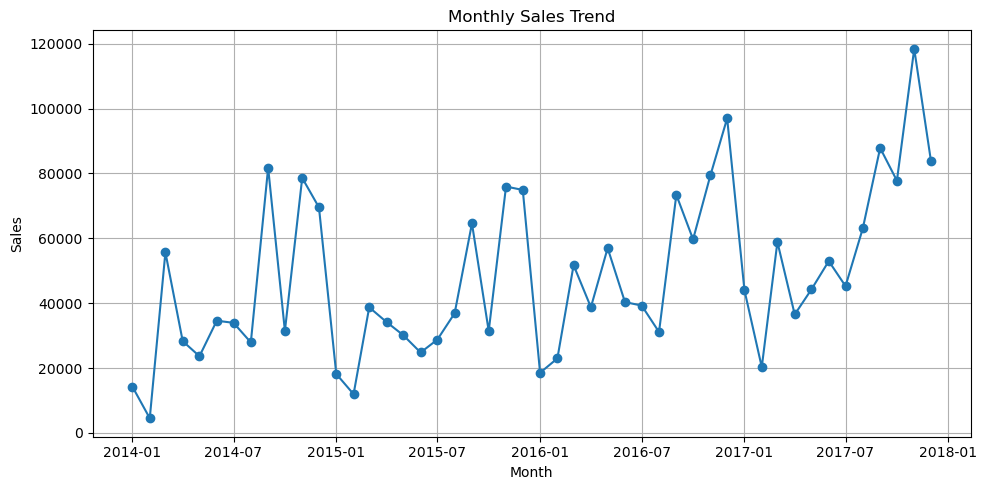

In [62]:
# 3.4 MONTHLY SALES TREND (Simple line chart)
# -------------------------------------------------

monthly_sales = df.groupby(df["Order Date"].dt.to_period("M"))["Sales"].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
# 3.5 TOP LOSS-MAKING PRODUCTS (Table)
# -------------------------------------------------

loss_products = df.groupby("Product Name")[["Sales", "Profit"]].sum().reset_index()
loss_products = loss_products.sort_values("Profit").head(10)

print("\n===== TOP 10 LOSS-MAKING PRODUCTS =====")
display(loss_products)


===== TOP 10 LOSS-MAKING PRODUCTS =====


,Product Name,Sales,Profit
475,Cubify CubeX 3D Printer Double Head Print,11099.963,-8879.9704
985,Lexmark MX611dhe Monochrome Laser Printer,16829.901,-4589.9730
476,Cubify CubeX 3D Printer Triple Head Print,7999.980,-3839.9904
425,Chromcraft Bull-Nose Wood Oval Conference Tabl...,9917.640,-2876.1156
376,Bush Advantage Collection Racetrack Conference...,9544.725,-1934.3976
683,GBC DocuBind P400 Electric Binding System,17965.068,-1878.1662
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480,-1811.0784
1043,Martin Yale Chadless Opener Electric Letter Op...,16656.200,-1299.1836
285,Balt Solid Wood Round Tables,6518.754,-1201.0581
364,BoxOffice By Design Rectangular and Half-Moon ...,1706.250,-1148.4375


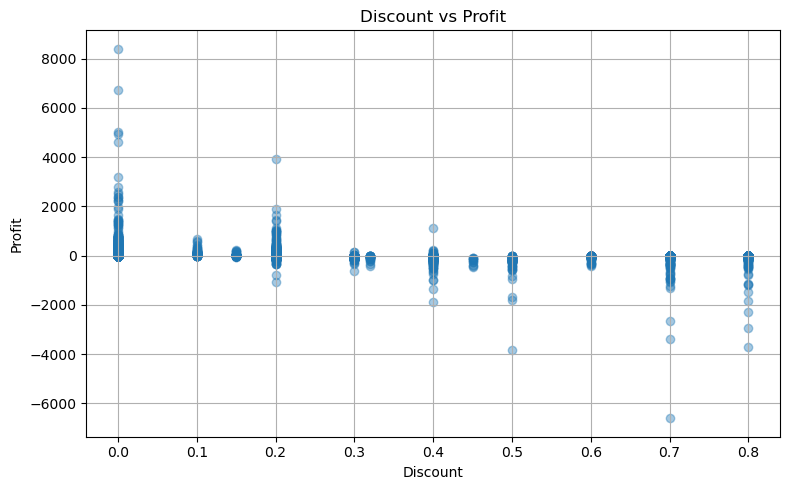

In [66]:
# 3.6 DISCOUNT VS PROFIT (simple scatter chart)
# -------------------------------------------------

plt.figure(figsize=(8,5))
plt.scatter(df["Discount"], df["Profit"], alpha=0.4)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

Loaded cleaned_superstore.csv
Saved monthly_sales_forecast_merge.csv (contains historical sales and forecasts)


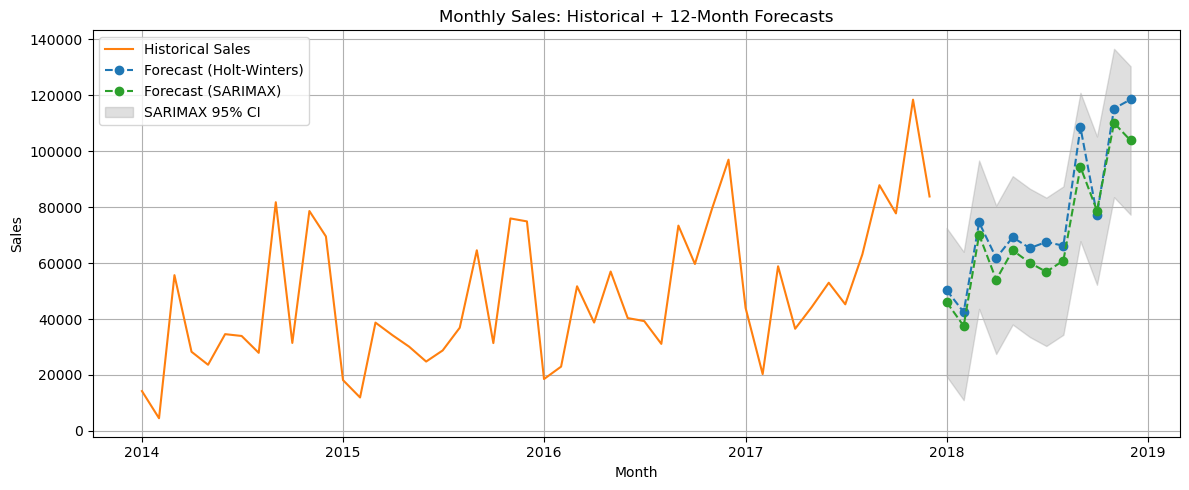


Last 6 historical months:


,Month,Sales
42,2017-07-01,45264.4160
43,2017-08-01,63120.8880
44,2017-09-01,87866.6520
45,2017-10-01,77776.9232
46,2017-11-01,118447.8250
47,2017-12-01,83829.3188



Holt-Winters Forecast (12 months):


,Month,Forecast_HW
0,2018-01-01,50321.382449
1,2018-02-01,42480.259261
2,2018-03-01,74560.388209
3,2018-04-01,61838.886811
4,2018-05-01,69236.677656
5,2018-06-01,65358.588777
6,2018-07-01,67568.990552
7,2018-08-01,66212.613835
8,2018-09-01,108524.429772
9,2018-10-01,77246.201781



SARIMAX Forecast (12 months) & 95% CI:


,Month,Forecast_SARIMAX,lower Sales,upper Sales
0,2018-01-01,46054.132910,19524.110116,72584.155703
1,2018-02-01,37519.296859,10988.439390,64050.154328
2,2018-03-01,70157.624797,43626.858020,96688.391573
3,2018-04-01,54039.829902,27509.149234,80570.510571
4,2018-05-01,64570.474641,38039.874881,91101.074402
5,2018-06-01,60102.264252,33571.739584,86632.788920
6,2018-07-01,56883.802709,30353.346698,83414.258720
7,2018-08-01,60897.789716,34367.395297,87428.184136
8,2018-09-01,94372.884619,67842.544082,120903.225156
9,2018-10-01,78764.768743,52234.473717,105295.063769


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# ---------- 1. Load cleaned data (or raw and clean) ----------
try:
    df = pd.read_csv("cleaned_superstore.csv")
    print("Loaded cleaned_superstore.csv")
except FileNotFoundError:
    print("cleaned_superstore.csv not found — loading raw and creating cleaned file")
    df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')
    df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
    df["Sales"] = pd.to_numeric(df["Sales"], errors="coerce")
    df["Profit"] = pd.to_numeric(df["Profit"], errors="coerce")
    df["Profit_Margin"] = (df["Profit"] / df["Sales"]) * 100
    df.to_csv("cleaned_superstore.csv", index=False)
    print("Saved cleaned_superstore.csv")

# Ensure dates and sort
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df = df.sort_values("Order Date")

# ---------- 2. Aggregate monthly sales ----------
monthly = df.groupby(df["Order Date"].dt.to_period("M"))["Sales"].sum().sort_index()
monthly.index = monthly.index.to_timestamp()
monthly = monthly.asfreq("MS")            # ensure a regular monthly index
ts = monthly.copy()
ts.name = "Sales"

# ---------- 3. Holt-Winters forecast (HW) with heuristic init + fallback ----------
hw_forecast = None
try:
    hw_model = ExponentialSmoothing(ts, trend="add", seasonal="add", seasonal_periods=12,
                                   initialization_method='heuristic')
    hw_fit = hw_model.fit(optimized=True)
except Exception as e:
    # fallback to more iterations and Nelder-Mead
    hw_fit = ExponentialSmoothing(ts, trend="add", seasonal="add", seasonal_periods=12,
                                  initialization_method='heuristic').fit(optimized=True, maxiter=3000, method='nm')

hw_steps = 12
hw_forecast = hw_fit.forecast(hw_steps)
hw_forecast.index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(1), periods=hw_steps, freq='MS')
hw_df = hw_forecast.reset_index()
hw_df.columns = ["Month", "Forecast_HW"]
hw_df.to_csv("monthly_sales_forecast_12mo_hw.csv", index=False)

# ---------- 4. SARIMAX forecast (with 95% CI) as alternative & to get CI ----------
sarimax_df = None
ci_lower = None
ci_upper = None
try:
    # Reasonable default SARIMAX(1,0,1)(1,1,1,12) — adjust if you want to tune
    sarimax_model = SARIMAX(ts, order=(1,0,1), seasonal_order=(1,1,1,12),
                            enforce_stationarity=False, enforce_invertibility=False)
    sarimax_res = sarimax_model.fit(disp=False)
    sarimax_forecast = sarimax_res.get_forecast(steps=hw_steps)
    sarimax_pred = sarimax_forecast.predicted_mean
    sarimax_ci = sarimax_forecast.conf_int(alpha=0.05)  # 95% CI
    sarimax_pred.index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(1), periods=hw_steps, freq='MS')
    sarimax_ci.index = sarimax_pred.index
    sarimax_df = sarimax_pred.reset_index(); sarimax_df.columns = ["Month", "Forecast_SARIMAX"]
    sarimax_df.to_csv("monthly_sales_forecast_12mo_sarimax.csv", index=False)
    ci_lower = sarimax_ci.iloc[:,0]
    ci_upper = sarimax_ci.iloc[:,1]
except Exception as e:
    print("SARIMAX failed:", e)
    sarimax_df = None

# ---------- 5. Merge historical monthly series + forecasts into one DataFrame ----------
hist_df = ts.reset_index()
hist_df.columns = ["Month", "Sales"]

# create forecast index
future_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthBegin(1), periods=hw_steps, freq='MS')
future_df = pd.DataFrame({"Month": future_index})

# merge forecasts
merged = hist_df.copy()
# append future months with NaN sales
merged = pd.concat([merged, future_df], ignore_index=True, sort=False)
merged["Month"] = pd.to_datetime(merged["Month"])

# join HW forecast
hw_map = hw_df.set_index("Month")["Forecast_HW"]
merged["Forecast_HW"] = merged["Month"].map(hw_map)

# join SARIMAX forecast & CI if available
if sarimax_df is not None:
    sar_map = sarimax_df.set_index("Month")["Forecast_SARIMAX"]
    merged["Forecast_SARIMAX"] = merged["Month"].map(sar_map)
    merged["SARIMAX_CI_Lower"] = merged["Month"].map(ci_lower)
    merged["SARIMAX_CI_Upper"] = merged["Month"].map(ci_upper)
else:
    merged["Forecast_SARIMAX"] = np.nan
    merged["SARIMAX_CI_Lower"] = np.nan
    merged["SARIMAX_CI_Upper"] = np.nan

# Save merged CSV (Power BI ready)
merged.to_csv("monthly_sales_forecast_merge.csv", index=False)
print("Saved monthly_sales_forecast_merge.csv (contains historical sales and forecasts)")

# ---------- 6. Plot historical + HW + SARIMAX + CI ----------
plt.figure(figsize=(12,5))
plt.plot(hist_df["Month"], hist_df["Sales"], label="Historical Sales", color="tab:orange")
# HW
plt.plot(hw_df["Month"], hw_df["Forecast_HW"], linestyle="--", marker="o", label="Forecast (Holt-Winters)", color="tab:blue")
# SARIMAX
if sarimax_df is not None:
    plt.plot(sarimax_df["Month"], sarimax_df["Forecast_SARIMAX"], linestyle="--", marker="o", label="Forecast (SARIMAX)", color="tab:green")
    # CI
    plt.fill_between(sarimax_df["Month"], ci_lower.values, ci_upper.values, color="gray", alpha=0.25, label="SARIMAX 95% CI")
plt.title("Monthly Sales: Historical + 12-Month Forecasts")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- 7. Show quick previews ----------
print("\nLast 6 historical months:")
display(hist_df.tail(6))
print("\nHolt-Winters Forecast (12 months):")
display(hw_df)
if sarimax_df is not None:
    print("\nSARIMAX Forecast (12 months) & 95% CI:")
    display(sarimax_df.join(sarimax_ci.reset_index(drop=True)))
else:
    print("\nSARIMAX forecast not available")

# ---------- End ----------